### Importing Libraries

In [1]:
import re                                # Regular expressions for cleaning the tweets
import tweepy                            # Twitter API library
from tweepy import OAuthHandler          # Authorization for the developer twitter account
import matplotlib.pyplot as plt          # Plotting the graphs
import numpy as np        
import pandas as pd
import math
import time
import nltk                              # Natural Language Tool Kit
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA  # Sentiment Analysis from NLTK library
from textblob import TextBlob            # TextBlob library

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Downloading NLTK Lexicon
##### Contains the sentiment values for NLTK Sentiment Analysis

In [2]:
# Lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Importing Twitter Credentials

In [0]:
# Load the credentials for the twitter developer account
import twitter_credentials

### Setting up authorization  and API object

In [0]:
auth = tweepy.OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)

auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

### Defining a function to fetch tweets and remove retweets

In [0]:
# Search query is the term you want to search
# Count refers to number of tweets to search

def fetch_tweets(search_query,count):

    search_query = search_query + " -filter:retweets"
    public_tweets = api.search(q = search_query,count = count)
    return public_tweets


### Define a function to clean the tweets 

In [0]:
# To clean punctuation marks, special characters and @ signs

def clean_tweets(tweet):
    string_tweet = str(tweet.text)
    clean_tw  = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", string_tweet).split())
    return clean_tw

### Define a function to obtain user for the tweet

In [0]:
# Obtaining user

def create_user(tweet):
    user = api.get_user(screen_name = tweet.user.screen_name)
    return user


### Define a function to obtain sentiment using NLTK library

In [0]:
# Sentiment Analysis

def sentiment_nltk(clean_tw):
  sia = SIA()
  analysis_nltk = sia.polarity_scores(clean_tw)
  return analysis_nltk

### Define a function to obtain sentiment using TextBlob library

In [0]:
# Sentiment Analysis

def sentiment_textblob(clean_tw):
    analysis_blob = TextBlob(clean_tw)
    return analysis_blob

### Define a function to display details of the analysis

In [0]:
def display_details():
  
    # Display the details of the tweet
    print("Tweet text :",clean_tw)
    print("Timestamp :",tweet.created_at)
    print("ID :",user.id)
    print("Screen Name :", user.screen_name)
    print("Location :",user.location)
    print("Followers :",user.followers_count)
    print("Number of Tweets :",user.statuses_count)
    print("Retweet count :",tweet.retweet_count)

    # Sentiments Obtained
    print("Sentiment predicted by TextBlob:",analysis_blob.sentiment)
    print("Sentiment predicted by NLTK:",analysis_nltk["compound"])

    # Display user weight
    print ("User Weight (TextBlob):", user_weight_blob)
    print ("User Weight (NLTK):", user_weight_nltk)

    # Formatting
    print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("                                                                                                                                                                 ")    

### Define a function to obtain tweet score


In [0]:
# Scores

# Tweet score - Assigns a score depending upon the number of tweets a user made - (range 0 to 1)

def tweet_scores(user):

    if user.statuses_count < 500:
      tweet_score  = 0.1
    elif user.statuses_count >=500 or user.statuses_count < 1000:
      tweet_score  = 0.2
    elif user.statuses_count >=1000 or user.statuses_count < 2000:
      tweet_score  = 0.3
    elif user.statuses_count >=2000 or user.statuses_count < 5000:
      tweet_score  = 0.4
    elif user.statuses_count >=5000 or user.statuses_count < 10000:
      tweet_score  = 0.5
    elif user.statuses_count >=10000 or user.statuses_count < 20000:
      tweet_score  = 0.6
    elif user.statuses_count >=20000 or user.statuses_count < 50000:
      tweet_score  = 0.7
    elif user.statuses_count >=50000 or user.statuses_count < 100000:
      tweet_score  = 0.8
    elif user.statuses_count >=100000 or user.statuses_count < 200000:
      tweet_score  = 0.9
    else: 
      tweet_score  = 1.0

    return tweet_score

In [0]:
# Scores

# Follower Score - Assigns a score depending upon the number of followers a user has - (range 0 to 1)

def follower_scores(user):

    if user.followers_count < 500:
      follower_score  = 0.1
    elif user.followers_count >=500 or user.followers_count < 1000:
      follower_score  = 0.2
    elif user.followers_count >=1000 or user.followers_count < 2000:
      follower_score  = 0.3
    elif user.followers_count >=2000 or user.followers_count < 5000:
      follower_score  = 0.4
    elif user.followers_count >=5000 or user.followers_count < 10000:
      follower_score  = 0.5
    elif user.followers_count >=10000 or user.followers_count < 20000:
      follower_score  = 0.6
    elif user.followers_count >=20000 or user.followers_count < 50000:
      follower_score  = 0.7
    elif user.followers_count >=50000 or user.followers_count < 100000:
      follower_score  = 0.8
    elif user.followers_count >=100000 or user.followers_count < 200000:
      follower_score  = 0.9
    else:
      follower_score  = 1.0

    return follower_score

In [0]:
# Score

# Retweet score- Assigns a score depending upon the number of times the tweet was retweeted- (range 0 to 1) 

def retweet_scores(tweet):

    if tweet.retweet_count < 100:
      retweet_score  = 0.1
    elif tweet.retweet_count >=100 or tweet.retweet_count < 200:
      retweet_score  = 0.2
    elif tweet.retweet_count >=200 or tweet.retweet_count < 500:
      retweet_score  = 0.3
    elif tweet.retweet_count >=500 or tweet.retweet_count < 1000:
      retweet_score  = 0.4
    elif tweet.retweet_count >=1000 or tweet.retweet_count < 2000:
      retweet_score  = 0.5
    elif tweet.retweet_count >=2000 or tweet.retweet_count < 5000:
      retweet_score  = 0.6
    elif tweet.retweet_count >=5000 or tweet.retweet_count < 10000:
      retweet_score  = 0.7
    elif tweet.retweet_count >=10000 or tweet.retweet_count < 20000:
      retweet_score  = 0.8
    elif tweet.retweet_count >=20000 or tweet.retweet_count < 50000:
      retweet_score  = 0.9
    else: 
      retweet_score  = 1.0
    
    return retweet_score

### Define a function to calculate weights using Text Blob

In [0]:
def weight_assignment_blob(analysis_blob,follower_score,tweet_score,retweet_score,negative_tweets_blob,positive_tweets_blob,neutral_tweets_blob,total_weight_negative_blob,total_weight_positive_blob):
    # Assigning the weights based on polarity

    if analysis_blob.sentiment.polarity > 0 :

      print ('According to TextBlob this tweet has a positive sentiment')

      # Calculate tweet counts
      positive_tweets_blob = positive_tweets_blob + 1
      negative_tweets_blob = negative_tweets_blob + 0
      neutral_tweets_blob = neutral_tweets_blob + 0

      # Calculate user weight
      user_weight_basic_blob = (follower_score + tweet_score + retweet_score)/3
      user_weight_blob = user_weight_basic_blob * abs(analysis_blob.sentiment.polarity)

      # Calculate total weight
      total_weight_positive_blob = total_weight_positive_blob + user_weight_blob
      total_weight_negative_blob = total_weight_negative_blob + 0

      # Return the results     
      return user_weight_blob,total_weight_positive_blob,total_weight_negative_blob,positive_tweets_blob,negative_tweets_blob,neutral_tweets_blob

    elif analysis_blob.sentiment.polarity < 0 :

      print ('According to TextBlob this tweet has a negative sentiment')

      # Calculate tweet counts
      positive_tweets_blob = positive_tweets_blob + 0
      negative_tweets_blob = negative_tweets_blob + 1
      neutral_tweets_blob = neutral_tweets_blob + 0

      # Calculate user weight
      user_weight_basic_blob = ((follower_score + tweet_score + retweet_score)/3)
      user_weight_blob = user_weight_basic_blob * abs(analysis_blob.sentiment.polarity)

      # Calculate total weight
      total_weight_positive_blob = total_weight_positive_blob + 0
      total_weight_negative_blob = total_weight_negative_blob + user_weight_blob

      # Return the results   
      return user_weight_blob,total_weight_positive_blob,total_weight_negative_blob,positive_tweets_blob,negative_tweets_blob,neutral_tweets_blob

    else:

      print ('According to TextBlob this tweet has a neutral sentiment')

      # Calculate tweet counts
      positive_tweets_blob = positive_tweets_blob + 0
      negative_tweets_blob = negative_tweets_blob + 0
      neutral_tweets_blob = neutral_tweets_blob + 1

      # Calculate user weight
      user_weight_basic_blob = 0.0
      user_weight_blob = 0.0

      # Calculate total weight
      total_weight_positive_blob = total_weight_positive_blob + user_weight_blob
      total_weight_negative_blob = total_weight_negative_blob + user_weight_blob

      # Return the results  
      return user_weight_blob,total_weight_positive_blob,total_weight_negative_blob,positive_tweets_blob,negative_tweets_blob,neutral_tweets_blob

### Define a function to calculate weights using NLTK

In [0]:
def weight_assignment_nltk(analysis_nltk,follower_score,tweet_score,retweet_score,negative_tweets_nltk,positive_tweets_nltk,neutral_tweets_nltk,total_weight_negative_nltk,total_weight_positive_nltk):
    # Assigning the weights based on polarity

    if analysis_nltk["compound"] > 0.20 :

      # Calculate tweet counts
      print ('According to NLTK this tweet has a positive sentiment')
      positive_tweets_nltk = positive_tweets_nltk + 1
      negative_tweets_nltk = negative_tweets_nltk + 0
      neutral_tweets_nltk = neutral_tweets_nltk + 0

      # Calculate user weight
      user_weight_basic_nltk = (follower_score + tweet_score + retweet_score)/3
      user_weight_nltk = user_weight_basic_nltk * abs(analysis_nltk["compound"])

      # Calculate total weight
      total_weight_positive_nltk = total_weight_positive_nltk + user_weight_nltk
      total_weight_negative_nltk = total_weight_negative_nltk + 0

      # Return the results   
      return user_weight_nltk,total_weight_positive_nltk,total_weight_negative_nltk,positive_tweets_nltk,negative_tweets_nltk,neutral_tweets_nltk

    elif analysis_nltk["compound"] < 0.20 :

      # Calculate tweet counts
      print ('According to NLTK this tweet has a negative sentiment')
      positive_tweets_nltk = negative_tweets_nltk + 0
      negative_tweets_nltk = negative_tweets_nltk + 1
      neutral_tweets_nltk = neutral_tweets_nltk + 0

      # Calculate user weight
      user_weight_basic_nltk = ((follower_score + tweet_score + retweet_score)/3)
      user_weight_nltk = user_weight_basic_nltk * abs(analysis_nltk["compound"])

      # Calculate total weight
      total_weight_positive_nltk = total_weight_positive_nltk + 0
      total_weight_negative_nltk = total_weight_negative_nltk + user_weight_nltk

      # Return the results
      return user_weight_nltk,total_weight_positive_nltk,total_weight_negative_nltk,positive_tweets_nltk,negative_tweets_nltk,neutral_tweets_nltk

    else:

      print ('According to NLTK this tweet has a neutral sentiment')

      # Calculate tweet counts
      positive_tweets_nltk = negative_tweets_nltk + 0
      negative_tweets_nltk = negative_tweets_nltk + 0
      neutral_tweets_nltk = neutral_tweets_nltk + 1

      # Calculate user weight
      user_weight_basic_nltk = 0.0
      user_weight_nltk = 0.0

      # Calculate total weight      
      total_weight_positive_nltk = total_weight_positive_nltk + user_weight_nltk
      total_weight_negative_nltk = total_weight_negative_nltk + user_weight_nltk

      # Return the results
      return user_weight_nltk,total_weight_positive_nltk,total_weight_negative_nltk,positive_tweets_nltk,negative_tweets_nltk,neutral_tweets_nltk

### Define a function to obtain the overall sentiment of the tweets using Text Blob

In [0]:
def overall_sentiment_blob (total_weight_positive_blob,total_weight_negative_blob,positive_tweets_blob,negative_tweets_blob,neutral_tweets_blob):
  
  # Display Aggregated Weights and Tweets
  print ("Text Blob Results")
  print ("Total weight positive :",total_weight_positive_blob)
  print ("Total weight negative :",total_weight_negative_blob)
  print ("Positive tweets :",positive_tweets_blob)
  print ("Negative tweets :",negative_tweets_blob)
  print ("Neutral tweets :",neutral_tweets_blob)

  # Overall sentiment

  if total_weight_positive_blob > total_weight_negative_blob :
    print ("According to TextBlob overall sentiment of the people was Positive")
  elif total_weight_positive_blob < total_weight_negative_blob :
    print ("According to TextBlob overall sentiment of the people was Negative")
  else:
    print ("According to TextBlob overall sentiment of the people was Neutral")


### Define a function to obtain the overall sentiment of the tweets using NLTK

In [0]:
def overall_sentiment_nltk (total_weight_positive_nltk,total_weight_negative_nltk,positive_tweets_nltk,negative_tweets_nltk,neutral_tweets_nltk):
  
  # Display Aggregated Weights and Tweets
  print ("NLTK Results")
  print ("Total weight positive :",total_weight_positive_nltk)
  print ("Total weight negative :",total_weight_negative_nltk)
  print ("Positive tweets :",positive_tweets_nltk)
  print ("Negative tweets :",negative_tweets_nltk)
  print ("Neutral tweets :",neutral_tweets_nltk)

  # Overall sentiment

  if total_weight_positive_nltk > total_weight_negative_nltk :
    print ("According to NLTK overall sentiment of the people was Positive")
  elif total_weight_positive_nltk < total_weight_negative_nltk :
    print ("According to NLTK overall sentiment of the people was Negative")
  else:
    print ("According to NLTK overall sentiment of the people was Neutral")
  

### Define a function to obtain the total tweets

In [0]:
def total_tweets(positive_tweets_blob,negative_tweets_blob,neutral_tweets_blob,positive_tweets_nltk,negative_tweets_nltk,neutral_tweets_nltk):
  # Total tweets
  total_tweets_blob = positive_tweets_blob + negative_tweets_blob + neutral_tweets_blob
  total_tweets_nltk = positive_tweets_nltk + negative_tweets_nltk + neutral_tweets_nltk

  return total_tweets_blob,total_tweets_nltk


### Define a function to visualize the results of the analysis using Text Blob

In [0]:
# Pie chart

def visualize_blob(positive_tweets_blob,negative_tweets_blob,total_tweets_blob):
  labels = ['Positive [' + str(positive_tweets_blob*100/total_tweets_blob) + '%]','Neutral [' + str(neutral_tweets_blob*100/total_tweets_blob) + '%]','Negative [' + str(negative_tweets_blob*100/total_tweets_blob) + '%]']
  sizes = [(positive_tweets_blob/total_tweets_blob), (neutral_tweets_blob/total_tweets_blob), (negative_tweets_blob/total_tweets_blob)]
  colors = ['yellowgreen', 'gold', 'red']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.legend(patches, labels, loc="best")
  plt.title('Sentiments Text Blob')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

### Define a function to visualize the results of the analysis using NLTK

In [0]:
# Pie chart

def visualize_nltk(positive_tweets_nltk,negative_tweets_nltk,total_tweets_nltk):
  labels = ['Positive [' + str(positive_tweets_nltk*100/total_tweets_nltk) + '%]','Neutral [' + str(neutral_tweets_nltk*100/total_tweets_nltk) + '%]','Negative [' + str(negative_tweets_nltk*100/total_tweets_nltk) + '%]']
  sizes = [(positive_tweets_nltk/total_tweets_nltk), (neutral_tweets_nltk/total_tweets_nltk), (negative_tweets_nltk/total_tweets_nltk)]
  colors = ['yellowgreen', 'gold', 'red']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.legend(patches, labels, loc="best")
  plt.title('Sentiments NLTK')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

### Call the function to fetch tweets using the search query and the number of tweets required

In [0]:
public_tweets = fetch_tweets("trudeau",10)


### Initialize variables

In [0]:
total_weight_positive_nltk = 0    # Total weight of positive tweets - NLTK
total_weight_negative_nltk = 0    # Total weight of negative tweets - NLTK
positive_tweets_nltk = 0          # Number of tweets - NLTK
negative_tweets_nltk = 0          # Number of tweets - NLTK
neutral_tweets_nltk = 0           # Number of tweets - NLTK

total_weight_positive_blob = 0    # Total weight of positive tweets - TextBlob
total_weight_negative_blob = 0    # Total weight of negative tweets - TextBlob
positive_tweets_blob = 0          # Number of tweets - TextBlob
negative_tweets_blob = 0          # Number of tweets - TextBlob
neutral_tweets_blob = 0           # Number of tweets - TextBlob

### Total Analysis

In [23]:
for tweet in public_tweets:
  user = create_user(tweet)                           # Obtain the user of the tweet
  clean_tw = clean_tweets(tweet)                      # Clean the obtained tweet
  analysis_blob = sentiment_textblob(clean_tw)        # Obtain the sentiment using TextBlob
  analysis_nltk = sentiment_nltk(clean_tw)            # Obtain the sentiment using NLTK
  tweet_score = tweet_scores(user)                    # Obtain the tweet score
  follower_score = follower_scores(user)              # Obtain the follower score
  retweet_score = retweet_scores(tweet)               # Obtain the retweet score
  user_weight_blob,total_weight_positive_blob,total_weight_negative_blob,positive_tweets_blob,negative_tweets_blob,neutral_tweets_blob = weight_assignment_blob(analysis_blob,follower_score,tweet_score,retweet_score,negative_tweets_blob,positive_tweets_blob,neutral_tweets_blob,total_weight_negative_blob,total_weight_positive_blob)
  user_weight_nltk,total_weight_positive_nltk,total_weight_negative_nltk,positive_tweets_nltk,negative_tweets_nltk,neutral_tweets_nltk = weight_assignment_nltk(analysis_nltk,follower_score,tweet_score,retweet_score,negative_tweets_nltk,positive_tweets_nltk,neutral_tweets_nltk,total_weight_negative_nltk,total_weight_positive_nltk)
  display_details()                                   # Display the details of the tweet and user

According to TextBlob this tweet has a neutral sentiment
According to NLTK this tweet has a negative sentiment
Tweet text : Les mères et les pères du Québec voyez le sort réserv vos petites filles encore organiser par Trudeau le TRAÎTRE.
Timestamp : 2019-11-12 02:36:49
ID : 3362966092
Screen Name : fern7123
Location : 
Followers : 170
Number of Tweets : 5283
Retweet count : 0
Sentiment predicted by TextBlob: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment predicted by NLTK: 0.0
User Weight (TextBlob): 0.0
User Weight (NLTK): 0.0
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                                                 
According to TextBlob this tweet has a neutral sentiment
According to NLTK this tweet has a negative sentiment
Tweet text : _faulkner Giv

### Call the function to obtain overall sentiments of the analysis

In [24]:
# Overall sentiment using Text Blob
overall_sentiment_blob(total_weight_positive_blob,total_weight_negative_blob,positive_tweets_blob,negative_tweets_blob,neutral_tweets_blob)

# Formatting
print("-----------------------------------------------------------------------------------------------------------------------------------")
print("                                                                                                                                   ")

# Overall sentiment using NLTK
overall_sentiment_nltk(total_weight_positive_nltk,total_weight_negative_nltk,positive_tweets_nltk,negative_tweets_nltk,neutral_tweets_nltk)

Text Blob Results
Total weight positive : 0.02666666666666667
Total weight negative : 0.2551041666666667
Positive tweets : 1
Negative tweets : 5
Neutral tweets : 4
According to TextBlob overall sentiment of the people was Negative
-----------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                   
NLTK Results
Total weight positive : 0.05956
Total weight negative : 0.2067466666666667
Positive tweets : 7
Negative tweets : 8
Neutral tweets : 0
According to NLTK overall sentiment of the people was Negative


### Obtain the total number of tweets

In [0]:
total_tweets_blob,total_tweets_nltk = total_tweets(positive_tweets_blob,negative_tweets_blob,neutral_tweets_blob,positive_tweets_nltk,negative_tweets_nltk,neutral_tweets_nltk)

### Visualize the results of the analysis

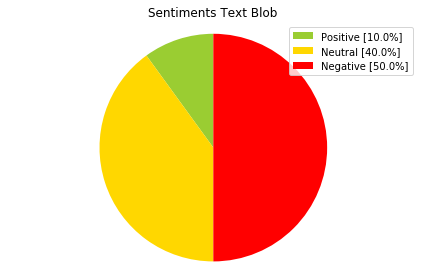

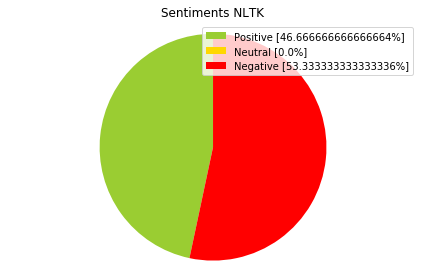

In [26]:
visualize_blob(positive_tweets_blob,negative_tweets_blob,total_tweets_blob)
visualize_nltk(positive_tweets_nltk,negative_tweets_nltk,total_tweets_nltk)